In [74]:
library("randomForest")


In [75]:
soja <- read.csv(
    "../data/soybean.csv",
    sep = ",",
    na.strings = "",
    stringsAsFactors = TRUE
)

nrow(soja)
dim(soja)
head(soja, 10)


[1] 683

[1] 683  36

,date,plant.stand,precip,temp,hail,crop.hist,area.damaged,severity,seed.tmt,germination,⋯,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots,class
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
5,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
6,september,normal,gt-norm,norm,yes,same-lst-sev-yrs,scattered,pot-severe,none,80-89,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
7,september,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,fungicide,90-100,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
8,august,normal,gt-norm,norm,no,same-lst-yr,scattered,pot-severe,none,lt-80,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
9,october,normal,gt-norm,norm,yes,same-lst-sev-yrs,scattered,pot-severe,fungicide,80-89,⋯,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [76]:
amostra <- sample(2, nrow(soja), replace = TRUE, prob = c(0.7, 0.3))

treino <- soja[amostra == 1, ]
teste <- soja[amostra == 2, ]

nrow(treino)
nrow(teste)


[1] 500

[1] 183

In [77]:
modelo <- randomForest(
    class ~ .,
    data = treino,
    ntree = 1000,
    proximity = TRUE
)

modelo



Call:
 randomForest(formula = class ~ ., data = treino, ntree = 1000,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 5.2%
Confusion matrix:
                            2-4-d-injury alternarialeaf-spot anthracnose
2-4-d-injury                          12                   0           0
alternarialeaf-spot                    0                  65           0
anthracnose                            0                   0          29
bacterial-blight                       0                   0           0
bacterial-pustule                      0                   0           0
brown-spot                             0                   1           0
brown-stem-rot                         0                   0           0
charcoal-rot                           0                   0           0
cyst-nematode                          0           

In [78]:
predicao <- predict(modelo, teste)

predicao


1                           2 
      diaporthe-stem-canker       diaporthe-stem-canker 
                          4                           7 
      diaporthe-stem-canker       diaporthe-stem-canker 
                          8                          10 
      diaporthe-stem-canker       diaporthe-stem-canker 
                         12                          18 
               charcoal-rot                charcoal-rot 
                         34                          35 
           phytophthora-rot            phytophthora-rot 
                         38                          39 
           phytophthora-rot            phytophthora-rot 
                         44                          45 
           phytophthora-rot            phytophthora-rot 
                         49                          52 
           phytophthora-rot            phytophthora-rot 
                         61                          64 
           phytophthora-rot            phytophthora-rot 
                         70                          73 
           phytophthora-rot              brown-stem-rot 
                         76                          81 
             brown-stem-rot              brown-stem-rot 
                         83                          85 
             brown-stem-rot              brown-stem-rot 
                         88                          89 
             brown-stem-rot              brown-stem-rot 
                         92                          93 
             powdery-mildew              powdery-mildew 
                         99                         105 
             powdery-mildew                downy-mildew 
                        109                         110 
               downy-mildew                downy-mildew 
                        120                         121 
                 brown-spot                  brown-spot 
                        122                         125 
                 brown-spot                  brown-spot 
                        126                         141 
                 brown-spot                  brown-spot 
                        145                         154 
                 brown-spot            bacterial-blight 
                        158                         163 
           bacterial-blight           bacterial-pustule 
                        174                         180 
          purple-seed-stain           purple-seed-stain 
                        182                         183 
                anthracnose                 anthracnose 
                        187                         188 
                anthracnose                 anthracnose 
                        190                         203 
                anthracnose      phyllosticta-leaf-spot 
                        204                         208 
     phyllosticta-leaf-spot      phyllosticta-leaf-spot 
                        209                         211 
     phyllosticta-leaf-spot         alternarialeaf-spot 
                        214                         217 
        alternarialeaf-spot         alternarialeaf-spot 
                        223                         226 
        alternarialeaf-spot         alternarialeaf-spot 
                        230                         233 
        alternarialeaf-spot         alternarialeaf-spot 
                        236                         237 
        alternarialeaf-spot         alternarialeaf-spot 
                        243                         248 
        alternarialeaf-spot         alternarialeaf-spot 
                        259                         271 
        alternarialeaf-spot         alternarialeaf-spot 
                        273                         274 
         frog-eye-leaf-spot          frog-eye-leaf-spot 
                        278                         280 
        alternarialeaf-spot          frog-eye-leaf-spot 
                        284         

In [79]:
modelo$confusion


,2-4-d-injury,alternarialeaf-spot,anthracnose,bacterial-blight,bacterial-pustule,brown-spot,brown-stem-rot,charcoal-rot,cyst-nematode,diaporthe-pod-&-stem-blight,diaporthe-stem-canker,downy-mildew,frog-eye-leaf-spot,herbicide-injury,phyllosticta-leaf-spot,phytophthora-rot,powdery-mildew,purple-seed-stain,rhizoctonia-root-rot,class.error
2-4-d-injury,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
alternarialeaf-spot,0,65,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.02985075
anthracnose,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-blight,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-pustule,0,0,0,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.11764706
brown-spot,0,1,0,0,0,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0.02777778
brown-stem-rot,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
charcoal-rot,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0.00000000
cyst-nematode,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0.00000000
diaporthe-pod-&-stem-blight,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0.00000000


In [80]:
1 - mean(modelo$confusion[, "class.error"])


[1] 0.9654713

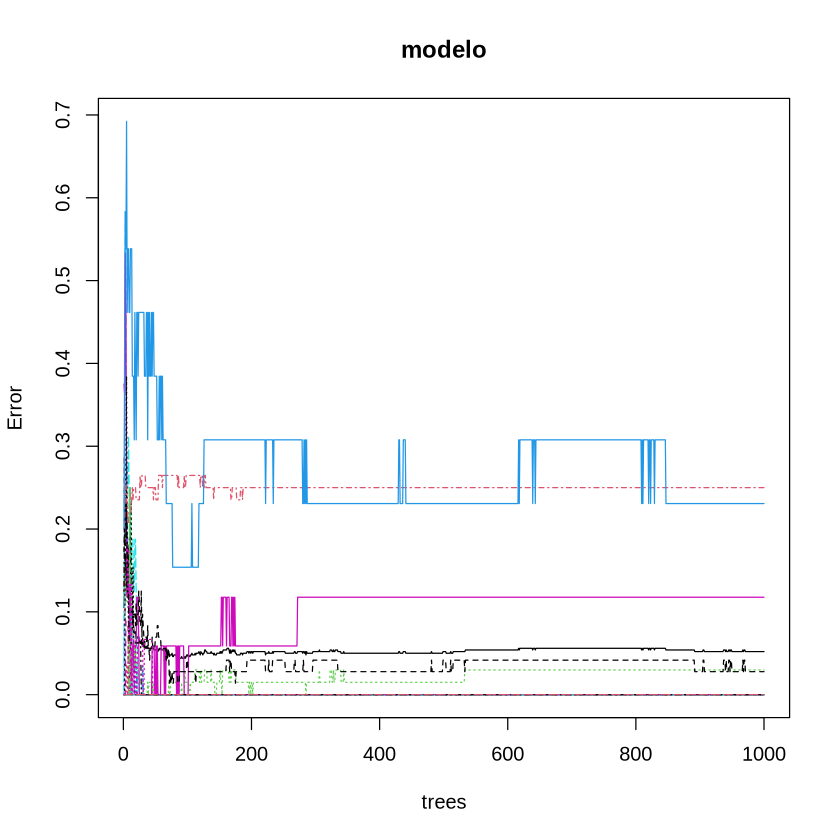

In [81]:
plot(modelo)


In [82]:
modelo <- randomForest(
    class ~ .,
    data = treino,
    ntree = 400,
    proximity = TRUE
)

modelo



Call:
 randomForest(formula = class ~ ., data = treino, ntree = 400,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 400
No. of variables tried at each split: 5

        OOB estimate of  error rate: 5.4%
Confusion matrix:
                            2-4-d-injury alternarialeaf-spot anthracnose
2-4-d-injury                          12                   0           0
alternarialeaf-spot                    0                  66           0
anthracnose                            0                   0          29
bacterial-blight                       0                   0           0
bacterial-pustule                      0                   0           0
brown-spot                             0                   2           0
brown-stem-rot                         0                   0           0
charcoal-rot                           0                   0           0
cyst-nematode                          0             

In [83]:
predicao <- predict(modelo, teste)

predicao

1                           2 
      diaporthe-stem-canker       diaporthe-stem-canker 
                          4                           7 
      diaporthe-stem-canker       diaporthe-stem-canker 
                          8                          10 
      diaporthe-stem-canker       diaporthe-stem-canker 
                         12                          18 
               charcoal-rot                charcoal-rot 
                         34                          35 
           phytophthora-rot            phytophthora-rot 
                         38                          39 
           phytophthora-rot            phytophthora-rot 
                         44                          45 
           phytophthora-rot            phytophthora-rot 
                         49                          52 
           phytophthora-rot            phytophthora-rot 
                         61                          64 
           phytophthora-rot            phytophthora-rot 
                         70                          73 
           phytophthora-rot              brown-stem-rot 
                         76                          81 
             brown-stem-rot              brown-stem-rot 
                         83                          85 
             brown-stem-rot              brown-stem-rot 
                         88                          89 
             brown-stem-rot              brown-stem-rot 
                         92                          93 
             powdery-mildew              powdery-mildew 
                         99                         105 
             powdery-mildew                downy-mildew 
                        109                         110 
               downy-mildew                downy-mildew 
                        120                         121 
                 brown-spot                  brown-spot 
                        122                         125 
                 brown-spot                  brown-spot 
                        126                         141 
                 brown-spot                  brown-spot 
                        145                         154 
                 brown-spot            bacterial-blight 
                        158                         163 
           bacterial-blight           bacterial-pustule 
                        174                         180 
          purple-seed-stain           purple-seed-stain 
                        182                         183 
                anthracnose                 anthracnose 
                        187                         188 
                anthracnose                 anthracnose 
                        190                         203 
                anthracnose         alternarialeaf-spot 
                        204                         208 
     phyllosticta-leaf-spot      phyllosticta-leaf-spot 
                        209                         211 
     phyllosticta-leaf-spot         alternarialeaf-spot 
                        214                         217 
        alternarialeaf-spot         alternarialeaf-spot 
                        223                         226 
        alternarialeaf-spot         alternarialeaf-spot 
                        230                         233 
        alternarialeaf-spot         alternarialeaf-spot 
                        236                         237 
        alternarialeaf-spot         alternarialeaf-spot 
                        243                         248 
        alternarialeaf-spot         alternarialeaf-spot 
                        259                         271 
        alternarialeaf-spot         alternarialeaf-spot 
                        273                         274 
         frog-eye-leaf-spot          frog-eye-leaf-spot 
                        278                         280 
        alternarialeaf-spot          frog-eye-leaf-spot 
                        284         

In [84]:
modelo$confusion

,2-4-d-injury,alternarialeaf-spot,anthracnose,bacterial-blight,bacterial-pustule,brown-spot,brown-stem-rot,charcoal-rot,cyst-nematode,diaporthe-pod-&-stem-blight,diaporthe-stem-canker,downy-mildew,frog-eye-leaf-spot,herbicide-injury,phyllosticta-leaf-spot,phytophthora-rot,powdery-mildew,purple-seed-stain,rhizoctonia-root-rot,class.error
2-4-d-injury,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
alternarialeaf-spot,0,66,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01492537
anthracnose,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-blight,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
bacterial-pustule,0,0,0,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.11764706
brown-spot,0,2,0,0,0,69,0,0,0,0,0,0,1,0,0,0,0,0,0,0.04166667
brown-stem-rot,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.00000000
charcoal-rot,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0.00000000
cyst-nematode,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0.00000000
diaporthe-pod-&-stem-blight,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0.00000000


In [85]:
1 - mean(modelo$confusion[, "class.error"])

[1] 0.9614773

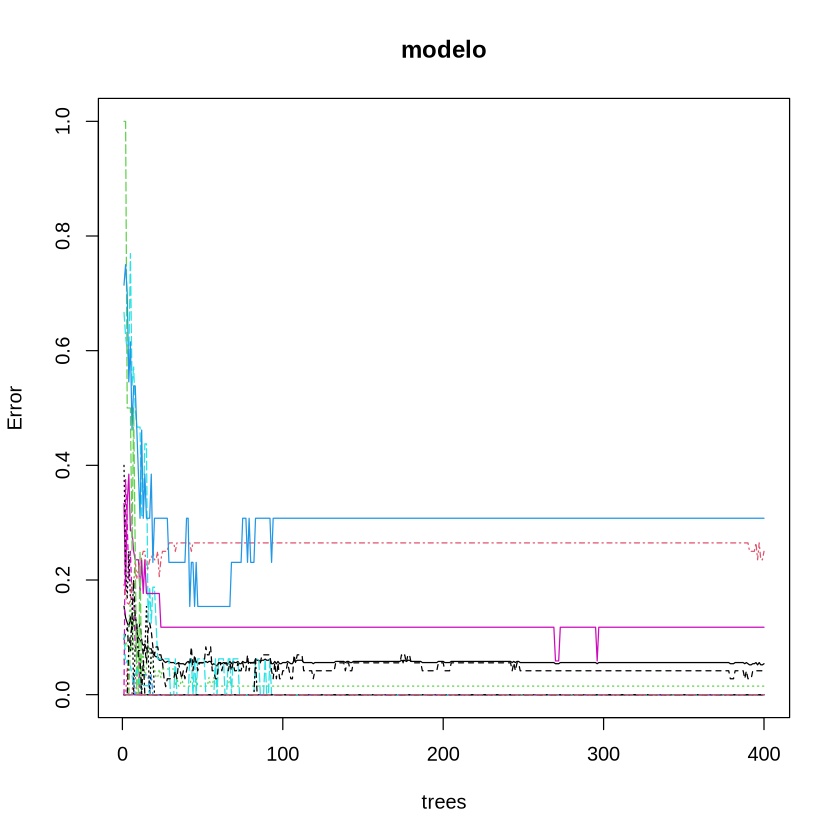

In [86]:
plot(modelo)